<a href="https://colab.research.google.com/github/salmaelgd/Data_Analysis/blob/main/ACP_school_subjects_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#chargement des données
import pandas
D = pandas.read_excel("/content/drive/MyDrive/ACPexam.xlsx",sheet_name="Sheet1")

print(D)

  Unnamed: 0  Maths  Physique  Français  Anglais  Musique
0    Chirine    6.0       6.0       5.0      5.5        8
1      Rayan    8.0       8.0       8.0      8.0        9
2        Jad    6.0       7.0      11.0      9.5       11
3      Lamia   14.5      14.5      15.5     15.0        8
4      Jamal   14.0      14.0      12.0     12.0       10
5      Mehdi   11.0      10.0       5.5      7.0       13
6      Faris    5.5       7.0      14.0     11.5       10
7       Anas   13.0      12.5       8.5      9.5       12
8     Mariem    9.0       9.5      12.5     12.0       18


In [ ]:
#récupération des variables actives
D= D[['Maths','Physique','Français','Anglais','Musique']]
print(D)

   Maths  Physique  Français  Anglais  Musique
0    6.0       6.0       5.0      5.5        8
1    8.0       8.0       8.0      8.0        9
2    6.0       7.0      11.0      9.5       11
3   14.5      14.5      15.5     15.0        8
4   14.0      14.0      12.0     12.0       10
5   11.0      10.0       5.5      7.0       13
6    5.5       7.0      14.0     11.5       10
7   13.0      12.5       8.5      9.5       12
8    9.0       9.5      12.5     12.0       18


In [ ]:
import numpy

In [ ]:
#former la matrice X avec (p=6) variables maintenant
X = D.values
#calculer la matrice de covariance
#rowvar = False pour dire que les variables sont organisées en colonnes
#ddof = 0 pour utiliser (1/n)
V = numpy.cov(X,ddof=0,rowvar=False)
numpy.set_printoptions(precision=2,suppress=True)
print(V)

[[11.39  9.92  2.66  4.58  0.11]
 [ 9.92  8.94  4.12  5.25  0.06]
 [ 2.66  4.12 12.06  9.19  0.39]
 [ 4.58  5.25  9.19  7.67  0.72]
 [ 0.11  0.06  0.39  0.72  8.67]]


In [ ]:
#nombre de variables
p = D.shape[1]

#nombre d'observations
n = D.shape[0]


In [ ]:
#calculer la trace de la matrice V
trace = V.trace()
print(trace)

48.72839506172839


In [ ]:
#vecteur moyenne
moyennes = numpy.mean(X,axis=0)

In [ ]:
#matrice Z des variables centrées
Y = X - moyennes
print(pandas.DataFrame(Y,index=D.index))

          0         1         2    3    4
0 -3.666667 -3.833333 -5.222222 -4.5 -3.0
1 -1.666667 -1.833333 -2.222222 -2.0 -2.0
2 -3.666667 -2.833333  0.777778 -0.5  0.0
3  4.833333  4.666667  5.277778  5.0 -3.0
4  4.333333  4.166667  1.777778  2.0 -1.0
5  1.333333  0.166667 -4.722222 -3.0  2.0
6 -4.166667 -2.833333  3.777778  1.5 -1.0
7  3.333333  2.666667 -1.722222 -0.5  1.0
8 -0.666667 -0.333333  2.277778  2.0  7.0


In [ ]:
#(1/n) (Y'Y) ➔ V
print('2-Matrice de covariance')
print(numpy.dot(numpy.transpose(Y),Y)/n)

2-Matrice de covariance
[[11.39  9.92  2.66  4.58  0.11]
 [ 9.92  8.94  4.12  5.25  0.06]
 [ 2.66  4.12 12.06  9.19  0.39]
 [ 4.58  5.25  9.19  7.67  0.72]
 [ 0.11  0.06  0.39  0.72  8.67]]


In [ ]:
#matrice des corrélations
R = numpy.corrcoef(X,rowvar=False)
print(R)

[[1.   0.98 0.23 0.49 0.01]
 [0.98 1.   0.4  0.63 0.01]
 [0.23 0.4  1.   0.96 0.04]
 [0.49 0.63 0.96 1.   0.09]
 [0.01 0.01 0.04 0.09 1.  ]]


In [ ]:
#vecteur ecart-type pour (p = 6) variables
sigmas = numpy.std(X,axis=0)

#centrage et réduction
Z = (X - moyennes)/sigmas
print('1-Matrice centré réduite ')
print(Z)


1-Matrice centré réduite 
[[-1.09 -1.28 -1.5  -1.63 -1.02]
 [-0.49 -0.61 -0.64 -0.72 -0.68]
 [-1.09 -0.95  0.22 -0.18  0.  ]
 [ 1.43  1.56  1.52  1.81 -1.02]
 [ 1.28  1.39  0.51  0.72 -0.34]
 [ 0.4   0.06 -1.36 -1.08  0.68]
 [-1.23 -0.95  1.09  0.54 -0.34]
 [ 0.99  0.89 -0.5  -0.18  0.34]
 [-0.2  -0.11  0.66  0.72  2.38]]


In [ ]:
#correspondance : produit matriciel : (1/n) (Z'Z)
print('La matrice R')
print(numpy.dot(numpy.transpose(Z),Z)/n)

La matrice R
[[1.   0.98 0.23 0.49 0.01]
 [0.98 1.   0.4  0.63 0.01]
 [0.23 0.4  1.   0.96 0.04]
 [0.49 0.63 0.96 1.   0.09]
 [0.01 0.01 0.04 0.09 1.  ]]


In [ ]:
!pip install fanalysis

In [ ]:
#importer la classe de calcul
from fanalysis.pca import PCA

#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)

#lancer les calculs sur les données
acp.fit(X)

#propriétés de l'objet généré
print(dir(acp))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_sklearn_auto_wrap_output_keys', '_validate_data', '_validate_params', 'col_contrib_', 'col_coord_', 'col_cor_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_topandas', 'correlation_circle', 'eig_', 'eigen_vectors_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'means_', 'model_', 'n_components', 'n_components_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_c

In [ ]:
#valeurs propres
print(acp.eig_)

[[  2.86   1.15   0.98   0.     0.  ]
 [ 57.24  23.01  19.66   0.08   0.01]
 [ 57.24  80.25  99.91  99.99 100.  ]]


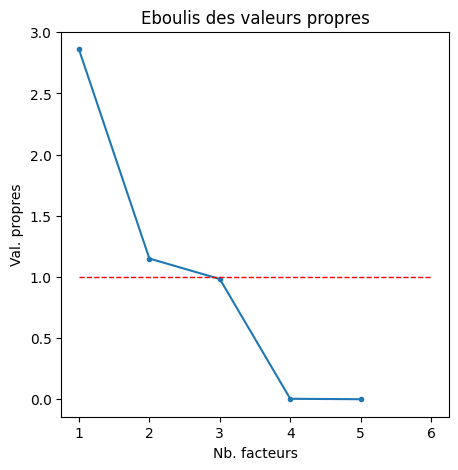

In [ ]:
%matplotlib inline
#librairie graphique
import matplotlib.pyplot as plt
#préparer le graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#rajout du seuil du Kaiser
ax.plot([1,6],[1,1],"r--",linewidth=1)
plt.show()

In [ ]:
#corrélation des variables avec les facteurs
print(pandas.DataFrame(acp.col_coord_[:,:3],index=D.columns))

                 0         1         2
Maths     0.805906  0.571358 -0.153443
Physique  0.897010  0.430792 -0.092851
Français  0.758088 -0.611047  0.225709
Anglais   0.910254 -0.397490  0.108423
Musique   0.066686 -0.327525 -0.942483


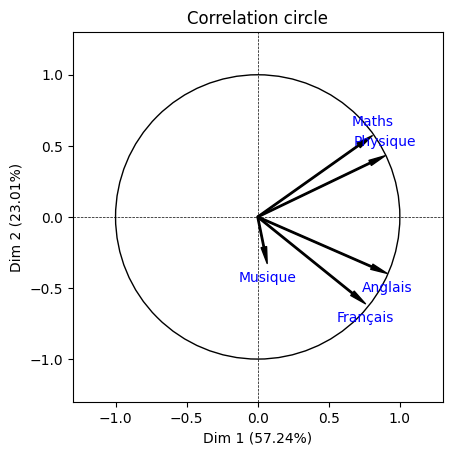

In [ ]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)

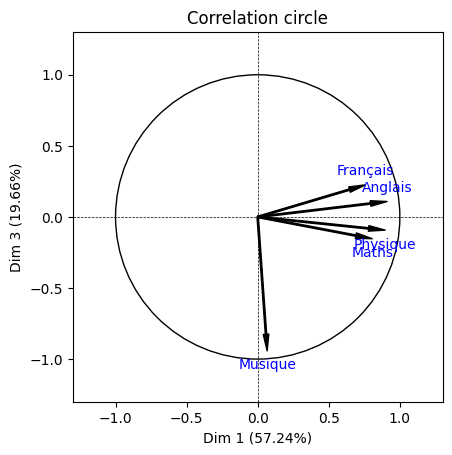

In [ ]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=3)

In [ ]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pandas.DataFrame(acp.col_contrib_[:,:2],index=D.columns))

                  0          1
Maths     22.694844  28.370193
Physique  28.115928  16.127955
Français  20.081534  32.448465
Anglais   28.952301  13.730869
Musique    0.155393   9.322519


In [ ]:
#cos2 des variables sur les 3 facteurs
print(pandas.DataFrame(acp.col_cos2_[:,:3],index=D.columns))

                 0         1         2
Maths     0.649485  0.326450  0.023545
Physique  0.804627  0.185581  0.008621
Français  0.574697  0.373378  0.050945
Anglais   0.828562  0.157999  0.011756
Musique   0.004447  0.107272  0.888274


In [ ]:
#cos2 cumulé sur les 3 premiers facteurs
print(pandas.DataFrame(numpy.cumsum(acp.col_cos2_[:,:3],axis=1),index=D.columns))

                 0         1         2
Maths     0.649485  0.975935  0.999480
Physique  0.804627  0.990208  0.998829
Français  0.574697  0.948075  0.999020
Anglais   0.828562  0.986561  0.998316
Musique   0.004447  0.111720  0.999994


# Pour les individus

In [ ]:
#coordonnées factorielles des individus dans le plan
print(pandas.DataFrame(acp.row_coord_[:,:3],index=D.index))

          0         1         2
0 -2.785716  0.676455  0.736801
1 -1.262490  0.330338  0.554950
2 -1.016747 -1.019829  0.288088
3  3.122145  0.165843  1.144268
4  1.955100  0.787905  0.189212
5 -0.947752  1.201405 -1.140111
6 -0.324968 -1.754739  0.909513
7  0.637341  1.129857 -0.691859
8  0.623086 -1.517236 -1.990864


In [ ]:
#données cenrrées et réduites
Z = (D.values - acp.means_) / acp.std_

#distance à l'origine des individus dans le repère initial
disto = numpy.apply_along_axis(arr=Z,axis=1,func1d=lambda x: numpy.sum(x**2))

#distance à l'origine à partir des coordonnées factorielles
distoBis = numpy.sum(acp.row_coord_**2,axis=1)

#affichage de contrôle
print(pandas.DataFrame(numpy.transpose(numpy.array([disto,distoBis])),index=D.index))

           0          1
0   8.764114   8.764114
1   2.012373   2.012373
2   2.160766   2.160766
3  11.094699  11.094699
4   4.488925   4.488925
5   3.643426   3.643426
6   4.013983   4.013983
7   2.164540   2.164540
8   6.657175   6.657175


In [ ]:
#cumul sur les 2 premiers facteurs
print(pandas.DataFrame(numpy.cumsum(acp.row_cos2_[:,:3],axis=1),index=D.index))

          0         1         2
0  0.885453  0.937665  0.999608
1  0.792041  0.846267  0.999305
2  0.478429  0.959764  0.998174
3  0.878599  0.881078  0.999094
4  0.851522  0.989816  0.997792
5  0.246536  0.642694  0.999460
6  0.026309  0.793405  0.999488
7  0.187663  0.777432  0.998573
8  0.058319  0.404112  0.999490


In [ ]:
#contributions sur les 3 premiers facteurs
lig_ctr = (acp.row_coord_[:,:3]**2)/(n*acp.eig_[0][:3])*100
print(pandas.DataFrame(lig_ctr,index=D.index))

           0          1          2
0  30.129319   4.418561   6.135385
1   6.188304   1.053709   3.480568
2   4.013665  10.042848   0.937980
3  37.846158   0.265581  14.797815
4  14.840671   5.994462   0.404613
5   3.487427  13.937380  14.690471
6   0.410011  29.732240   9.348890
7   1.577102  12.326784   5.409742
8   1.507343  22.228435  44.794537


In [ ]:
#cos2 des individus
lig_cos2 = numpy.apply_along_axis(arr=acp.row_coord_[:,:3],axis=0,func1d=lambda x: (x**2)/disto)
print(pandas.DataFrame(lig_cos2,index=D.index))

          0         1         2
0  0.885453  0.052212  0.061943
1  0.792041  0.054226  0.153038
2  0.478429  0.481334  0.038410
3  0.878599  0.002479  0.118016
4  0.851522  0.138295  0.007975
5  0.246536  0.396158  0.356766
6  0.026309  0.767096  0.206083
7  0.187663  0.589769  0.221141
8  0.058319  0.345793  0.595379


In [ ]:
#carte des individus
acp.mapping_col(num_x_axis=1,num_y_axis=2,figsize=(10,10))

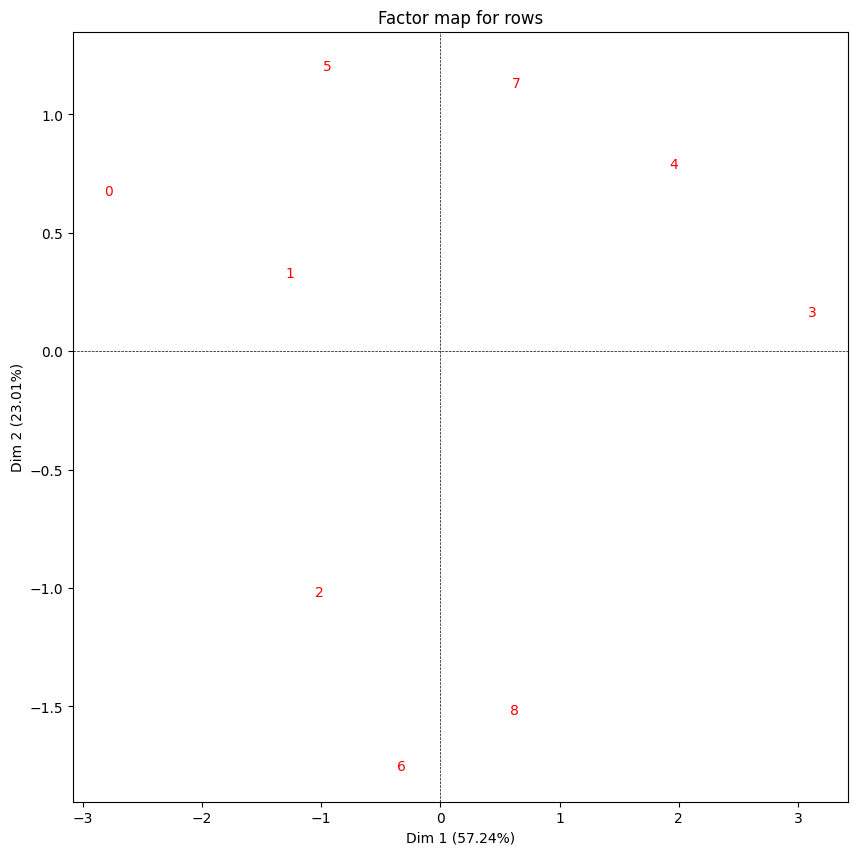

In [ ]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))

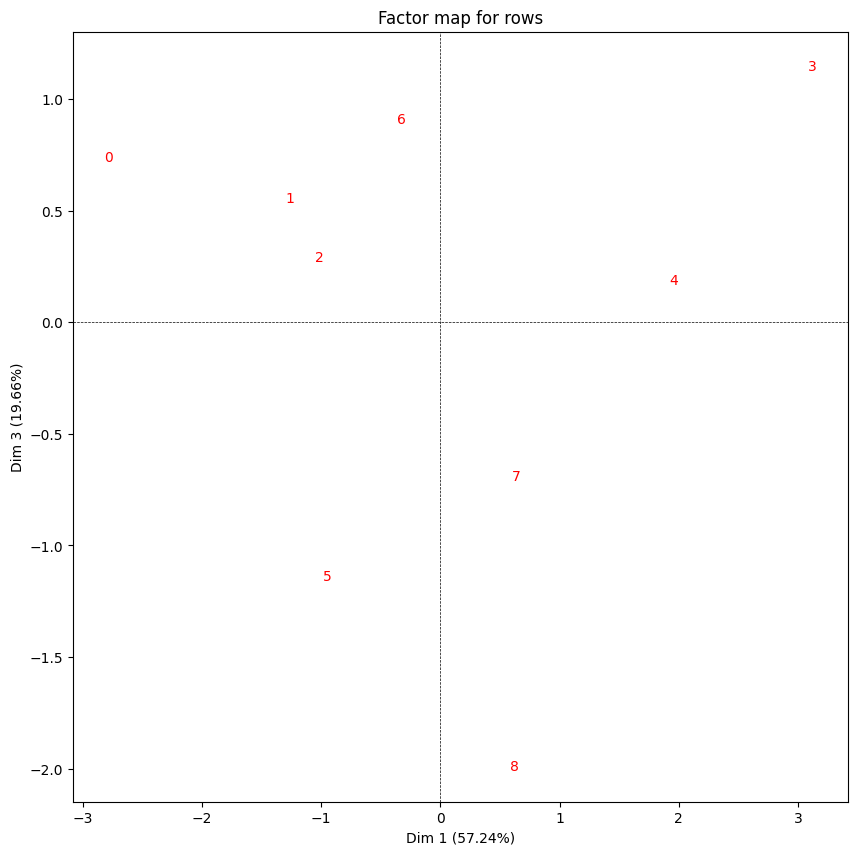

In [ ]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=3,figsize=(10,10))